# Drought Indexes Analysis

This Jupyter Notebook contains the analysis using PDSI, PET, RO and AET  
The idea of using multiples indexes is to show a more wide approach of the drought problem

In [1]:
import ee
import geemap
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [2]:
ee.Initialize()
start_date = "2013-11-01"
end_date = "2023-11-01"
roi = geemap.shp_to_ee("Data/petorca/petorca.shp", **{"encoding": "latin1"}).geometry()
dataset = ee.ImageCollection("IDAHO_EPSCOR/TERRACLIMATE").filterDate(start_date, end_date).filterBounds(roi)

## AET

In [3]:
m = geemap.Map()
aet_collection = dataset.select("aet")

vis_params = {
  "min": 0,
  "max":  3140,
  "palette": ["#f0f9ff", "#c2e2ff", "#94cbff", "#66b4ff", "#388dff", "#0077ff", "#0055cc", "#003d99", "#002666"]
}

m.center_object(roi)
m.add_layer(aet_collection, vis_params, "AET")
m.add_colorbar(vis_params, label="AET (cm) ", layer_name="AET", orientation="vertical")
m

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

## PET

In [4]:
m = geemap.Map()
pet_collection = dataset.select("pet")

vis_params = {
  "min": 0,
  "max":  4000,
  "palette": ["#f0f9ff", "#c2e2ff", "#94cbff", "#66b4ff", "#388dff", "#0077ff", "#0055cc", "#003d99", "#002666"]
}

m.center_object(roi)
m.add_layer(pet_collection, vis_params, "PET")
m.add_colorbar(vis_params, label="PET (cm) ", layer_name="PET", orientation="vertical")
m

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

## RO

In [5]:
m = geemap.Map()
ro_collection = dataset.select("ro")

vis_params_ro = {
  "min": 0,
  "max":  12560,
  "palette": ["#f0f9ff", "#c2e2ff", "#94cbff", "#66b4ff", "#388dff", "#0077ff", "#0055cc", "#003d99", "#002666"]
}

m.center_object(roi)
m.add_layer(ro_collection, vis_params_ro, "Runoff")
m.add_colorbar(vis_params_ro, label="RO (mm) ", layer_name="RO", orientation="vertical")
m

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

## PDSI

In [7]:
m = geemap.Map()
pdsi_collection = dataset.select("pdsi")

vis_params_pdsi = {
    'min': -4317,
    'max': 3418,
    'palette': ['1a3678', '2955bc', '5699ff', '8dbae9', 'acd1ff', 'caebff', 'e5f9ff', 'fdffb4', 'ffe6a2', 'ffc969', 'ffa12d', 'ff7c1f', 'ca531a', 'ff0000', 'ab0000'],
}

m.center_object(roi)
m.add_layer(pdsi_collection, vis_params_pdsi, "PDSI")
m.add_colorbar(vis_params_pdsi, label="PDSI index", layer_name="PDSI in scale 0.01", orientation="vertical")
m

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [8]:
dates = pdsi_collection.aggregate_array('system:time_start')

#dates from 2013-11-01 to 2023-11-01
dates_list = dates.getInfo()
human_readable_dates = [datetime.utcfromtimestamp(date / 1000).strftime('%Y-%m-%d') for date in dates_list]

print(human_readable_dates)

['2013-11-01', '2013-12-01', '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019

## Time Series for indexes

In [11]:
def extractPDSI(image):    
    date = image.date().format("YYYY-MM-dd")
    meanPDSI = image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=roi,
        scale=30  
    )
    
    feature = ee.Feature(roi, {
        "date": date,
        "meanPDSI": meanPDSI.get("pdsi")
    })
    
    return feature.set("system:time_start", image.get("system:time_start"))

def extractPET(image):    
    date = image.date().format("YYYY-MM-dd")
    meanPET = image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=roi,
        scale=30  
    )
    
    feature = ee.Feature(roi, {
        "date": date,
        "meanPET": meanPET.get("pet")
    })
    
    return feature.set("system:time_start", image.get("system:time_start"))

def extractRO(image):    
    date = image.date().format("YYYY-MM-dd")
    meanRO = image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=roi,
        scale=30  
    )
    
    feature = ee.Feature(roi, {
        "date": date,
        "meanRO": meanRO.get("ro")
    })
    
    return feature.set("system:time_start", image.get("system:time_start"))

def extractAET(image):    
    date = image.date().format("YYYY-MM-dd")
    meanAET = image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=roi,
        scale=30  
    )
    
    feature = ee.Feature(roi, {
        "date": date,
        "meanAET": meanAET.get("aet")
    })
    
    return feature.set("system:time_start", image.get("system:time_start"))

ts_pdsi = pdsi_collection.map(extractPDSI)
ts_pdsi = ts_pdsi.getInfo()["features"]
ts_pet = pet_collection.map(extractPET)
ts_pet = ts_pet.getInfo()["features"]
ts_ro = ro_collection.map(extractRO)
ts_ro = ts_ro.getInfo()["features"]
ts_aet = aet_collection.map(extractAET)
ts_aet = ts_aet.getInfo()["features"]

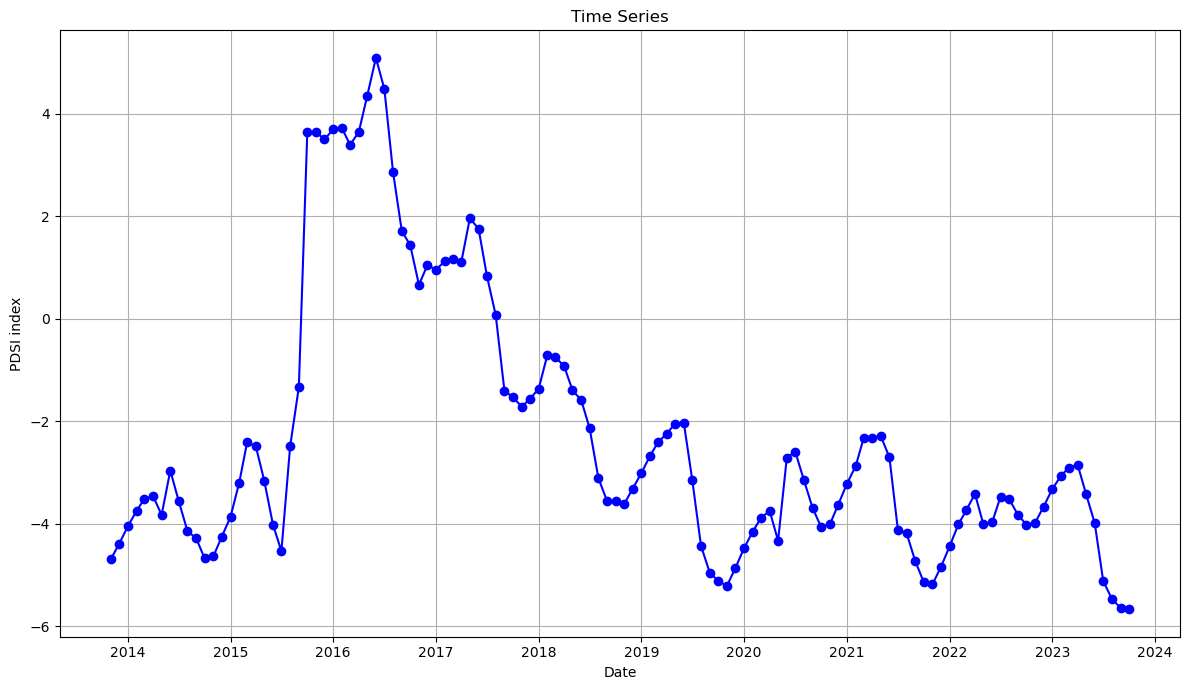

In [13]:
dates = [feature["properties"]["date"] for feature in ts_pdsi]
pdsi_values = [feature["properties"]["meanPDSI"] for feature in ts_pdsi]
pet_values = [feature["properties"]["meanPET"] for feature in ts_pet]
ro_values = [feature["properties"]["meanRO"] for feature in ts_ro]
aet_values = [feature["properties"]["meanAET"] for feature in ts_aet]

dates = [datetime.strptime(date, "%Y-%m-%d") for date in dates]


def plotting_pdsi(dates):
    pdsi_values_scaled = [value * 0.01 for value in pdsi_values]
    plt.figure(figsize=(12, 7))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.plot(dates, pdsi_values_scaled, marker="o", linestyle="-", color="b", label="PDSI")
    plt.title("Time Series")
    plt.xlabel("Date")
    plt.ylabel("PDSI index")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plotting_pdsi(dates)

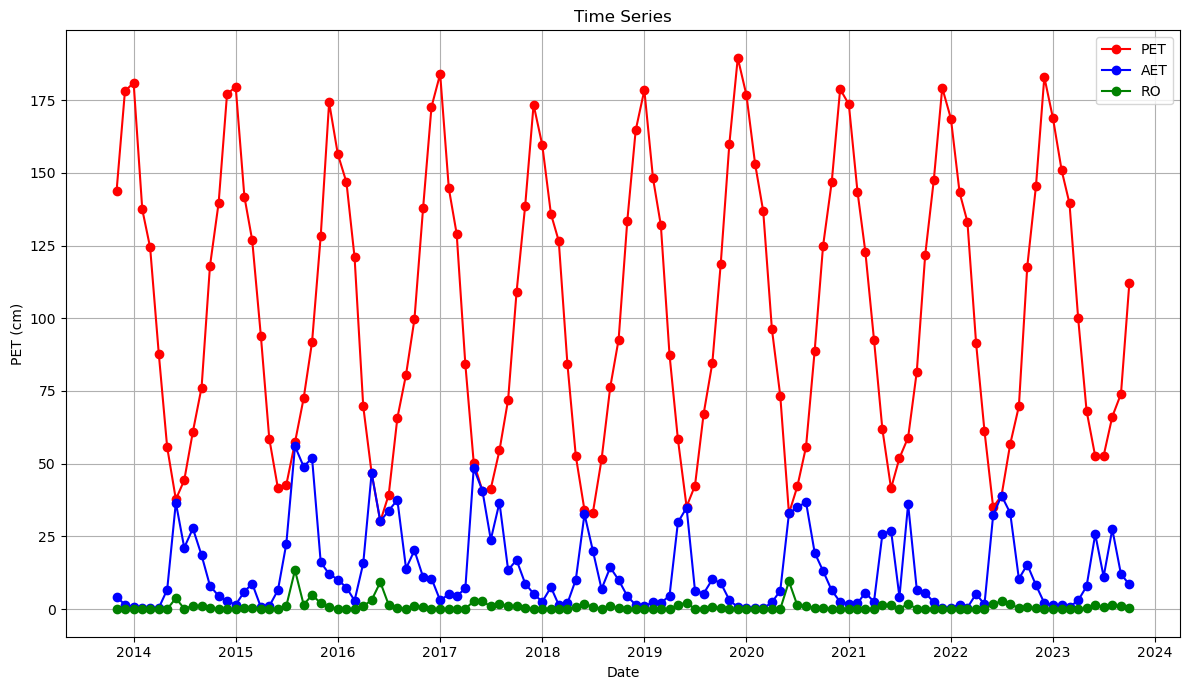

In [14]:
def plotting_water(dates):
    pet_values_es = [value * 0.1 for value in pet_values] #show corresponding scale
    aet_values_es = [value * 0.1 for value in aet_values] 
    
    plt.figure(figsize=(12, 7))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.plot(dates, pet_values_es, marker="o", linestyle="-", color="r", label="PET") #pet
    plt.plot(dates, aet_values_es, marker="o", linestyle="-", color="b", label="AET") #AET
    plt.plot(dates, ro_values, marker="o", linestyle="-", color="g", label="RO") #RO
    
    plt.title("Time Series")
    plt.xlabel("Date")
    plt.ylabel("PET (cm)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plotting_water(dates)